# Observation of a new gamma-ray source class

<h5 style="text-align:right; margin-right:15px"> 2023-08-12 16:36</h5>

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa5ed856260>

## Abstract
The most recent source catalog from the Large Area Telescope (LAT) instrument on
  _Fermi_, covering 14 years, contains 7190 non-transient point sources,
  of which 2371 have no co-location association with objects observed in other 
 wavelengths to provide confirmation of their identities. This has been a feature 
 of all catalogs since the first 8-month release in which 161 out of 630 were 
 unassociated. The unassociated sources (UNID) break down into roughly equal 
 Galactic and extra-Galactic populations. The origin of the latter is  accounted 
 for by the non-uniform coverage and sensitivity limit of the counterpart catalogs. 
 To examine the Galactic component of the UNID we apply a 
 predictive artificial intelligence technique using as features the 
 parameters of the peak in the spectral energy distribution, and the 
 variability measure. The UNID sources predicted to be pulsars have 
 significant spectral curvature, with peak energies in the range seen 
 in the pulsars used for training, and are clearly Galactic in spatial distribution. 
 But the distribution of curvatures and spectral peak energies is quite unlike that 
 seen for pulsars, with curvatures extending well above those expected for pulsasrs.
 We define a selection in the range
  of spectral parameters which almost all of these satisfy,  resulting in 617 total.
Applying the same selection to each of the associated source classes we see that none of the 
 resulting spatial distributions are consistent, the closest being 
 millisecond pulsars (94) and Galactic clusters (19). 
 While there may be some undetected pulsars in this set, we conclude that the
 majority must represent a new class of gamma-ray emitting sources.

## ML step summary
* Training set: pulsars (MSP + young), BL Lacs, FSRQs
* Features:  spectral peak parameters ( energy, flux, curvature), variability, energy flux
* predictions: UNID -> (UNID-PSR, UNID-BLL, UNID-FSRQ)

## Curvature vs. $E_p$ for UNID
The ML training depended strongly on the two spectral variables
peak curvature $d_p$ and energy $E_p$. Here we look at these 
variables for the predictions of the UNID sources.    

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa5ef017520>
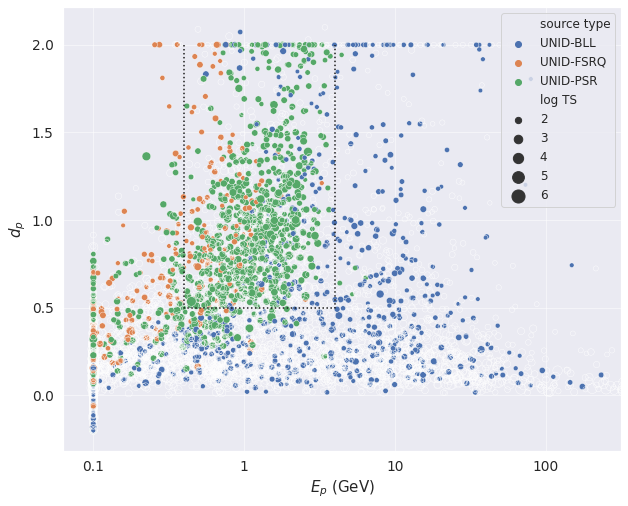

### Application of the "spectral cut" to the source classes
We subdivide the sources into the following ten subsets called "source types"
below<br>

Associated: 
* pulsars: MSP, young
* blazars: bll, fsrq, and bcu
* Galactic clusters: glc
* others: Everything else<br>

Unassociated: UNID-PSR, UNID-FSRQ and UNID-BLL according to ML prediction.

Preliminary spectral selection cuts are: 
* $d_p$ >0.5
* 0.4< $E_p$ < 4 GeV  
* $F_p$ < 20 eV s-1 cm-2

The resulting counts:

source type,MSP,young,bll,fsrq,bcu,glc,other,UNID-PSR,UNID-BLL,UNID-FSRQ,Total
All,174,139,1463,790,1556,33,314,878,838,311,6496
Spectral cut,99,20,56,66,251,22,104,617,117,117,1469


## Aitoff Skymaps
Here we show three sets of skymaps. First, for the three UNID subsets 
to assess the Galactic content of each; then the same three following the 
spectral cut, and finally four subsets of the associated sources
to look for candidates to account the Galactic sources accounting for 
the Galactic unassociated.

#### UNID 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa5ed854d00>
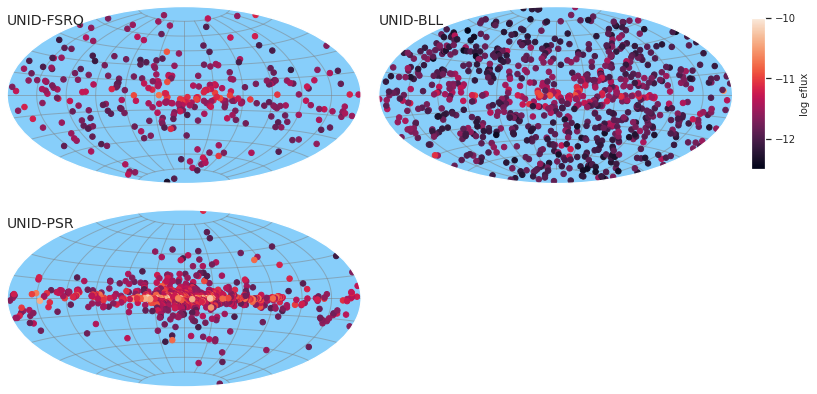

#### UNID after spectral cut

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa62c9a2b60>
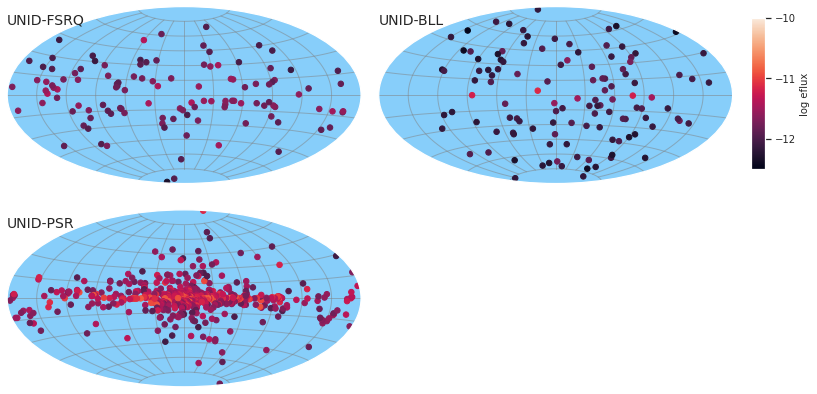

#### Associated after spectral cut 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa60c0db5b0>
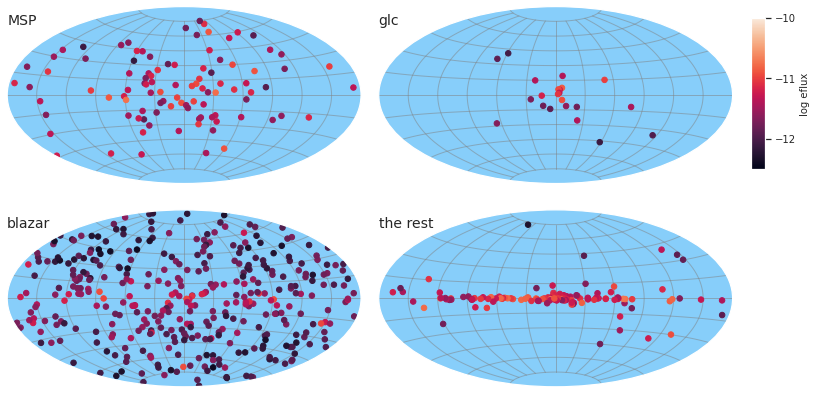

### Conclusions:
* Figure 2: The UNID-PSR were selected as such according to 
the spectral and variability only: Clearly they are dominantly Galactic.
* Figure 3: The specific spectral cut removes most of the blazar
types, including an apparent Galactic component while hardly changing the
UNID-PSR sources.
* Figure 4: Of the known Galactic classes with a multi-degree 
scale height, only MSP and glc are candidates. 

### Distributions in $|\sin(b)|$
WE look at distributions in $|\sin(b)|$ to estimate the contribution of undetected MSPs to 
UNID-PSR population.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa5ed6e3d30>
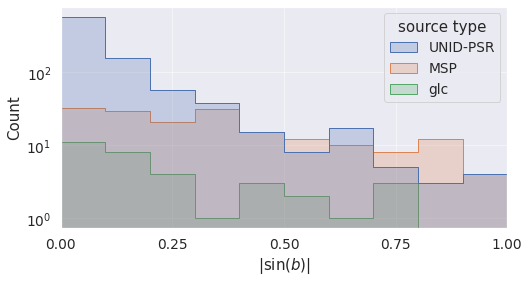

As seen in Figure 5, the number of undetected MSPs must be a large
fraction of 
all UNID-PSR sources above about $24^\circ$, in number equal to the
number of detected ones.

## Analysis of curvature vs. peak energy
For MSPs, the spectral curvature is  correlated with the
peak energy, a consequence of $\dot{E}$ evolution. 
Specifically it was shown that $E_p = 1.1\ \mathrm{GeV} (d_p/0.46)^{1.33}$ within 30%. [3PC paper]. 

In Figure 6 we show such a plot for MSPs, with the UNID-PSR and glc subsets overlayed
for comparison. 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa61585b250>
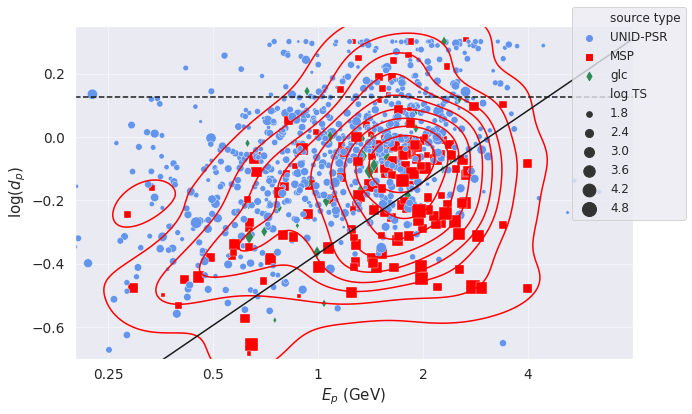

#### Using KDE to estimate MSP content of UNID-PSR
Using the KDE function derived from the $E_p$ vs. $d_p$, distributions, consider 
its distribution over the MSP and UNID-PSR subsets. Assuming that a component
of the UNID-PSR sources are undetected MSPs which would have a similar distribution,
we see from Figure 7 that the largest possible size is about four times the number currently
detected well under the latitude estimate of about the same number.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa5eeccfeb0>
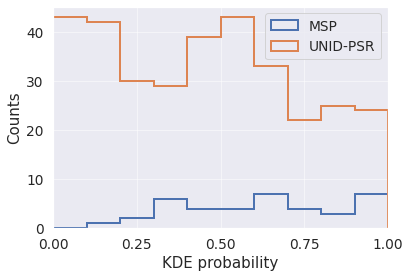

## Flux vs latitude for selected UNID-PSR sources
Here we select the selected UNID-PSR sources seen in Figure 3 
and look at the peak flux.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa6158f2b90>
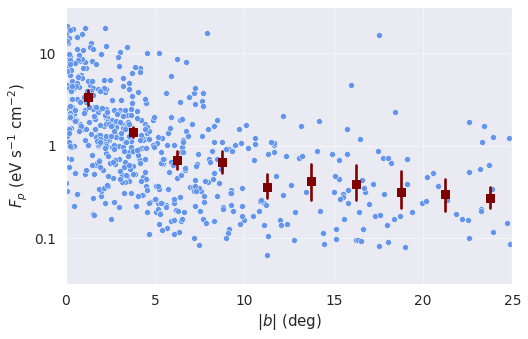

This is a puzzle, which cannot be ascribed to threshold selection effect
near the Galactic plane.

## The way forward
* Comments/suggestions on turning the above into a paper!
* Refit with 4FGL-DR4 only, (maybe Jean can produce a new version without the curvature prior? There is always DR3)
* A section on previous ML results (Elizabeth)
* A section on efforts to find associations (Kent)
* Hopefully speculation on the science behind curved sources narrower than pulsars (Kent? Matthew?)

In [6]:
%run pylib/paper
self = main()